# Logistic regression - multiclass

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits #dataset

In [2]:
digits = load_digits()

In [3]:
#what the dataset contains
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

data has the numeric data of the images and images has teh actual images.

In [4]:
#see the firt picture -> is represented by a one dimensional array
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

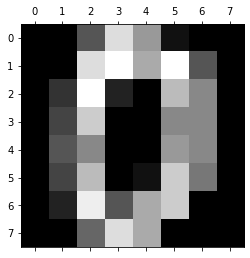

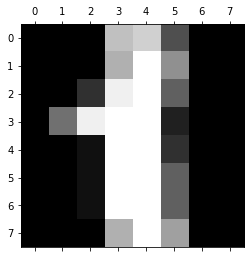

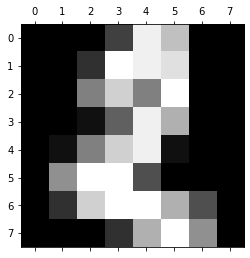

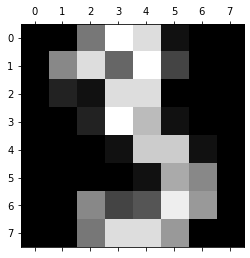

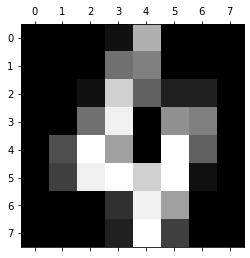

In [6]:
#plot the actual images of the dataset
plt.gray()
#print the first 5 images
for i in range(5):
    plt.matshow(digits.images[i])

In [7]:
digits.target[0:5] 
#the first image is 0 not 1

array([0, 1, 2, 3, 4])

We can use data and target to train the model.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size = 0.2)

In [15]:
len(X_train)

1437

In [16]:
len(X_test)

360

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = "newton-cg", multi_class="auto")

In [20]:
model.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [21]:
model.score(X_test,y_test)

0.9666666666666667

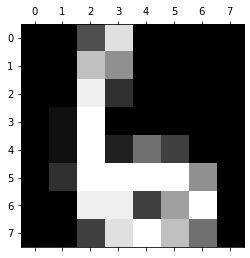

In [22]:
plt.matshow(digits.images[67])

In [23]:
digits.target[67]

6

In [24]:
model.predict([digits.data[67]])

array([6])

In [25]:
y_predicted = model.predict(X_test)

In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  1,  3,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 31,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  1,  0,  0,  0,  2,  0,  0,  0, 37]])

Text(69.0, 0.5, 'Truth')

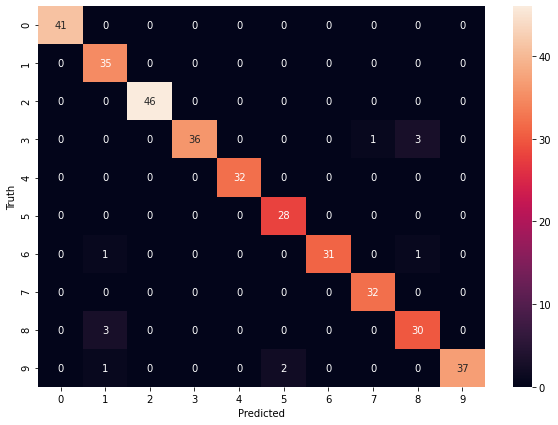

In [27]:
#visualize confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True) #heatmap with the confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Truth')

Exercise

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

- Setosa
- Versicolour
- Virginica

In [34]:
from sklearn.datasets import load_iris #dataset
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [36]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [39]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size = 0.2)

In [44]:
model2 = LogisticRegression(solver = "newton-cg", multi_class="auto")
model2.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [46]:
model2.score(X_test,y_test)

1.0

In [53]:
model2.predict([[5.1, 3.5, 1.4, 0.2]])

array([0])

In [49]:
y_predicted = model2.predict(X_test)

In [50]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 7,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  9]])

Text(24.0, 0.5, 'Truth')

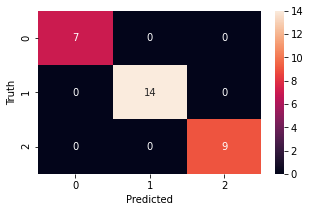

In [52]:
#visualize confusion matrix
import seaborn as sn
plt.figure(figsize = (5,3))
sn.heatmap(cm, annot = True) #heatmap with the confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Truth')